<a href="https://colab.research.google.com/github/priyansuapk/ml-lab-exam/blob/main/Lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

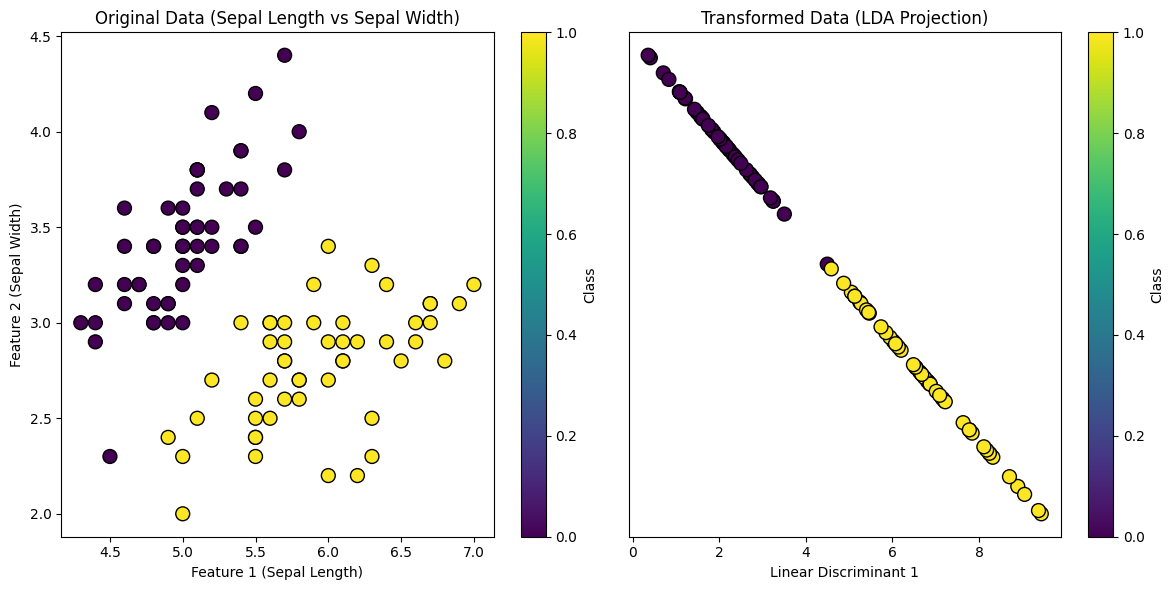

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select two features (e.g., Sepal Length and Sepal Width) and two classes (e.g., Class 0 and 1)
X = X[y < 2, :2]  # Selecting classes 0 and 1, and the first two features
y = y[y < 2]  # Update y to only contain classes 0 and 1

# LDA Implementation from Scratch
class LDAScratch:
    def __init__(self):
        self.w = None
        self.mean_vectors = None
        self.sw_inv = None

    def fit(self, X, y):
        # Number of classes
        classes = np.unique(y)
        n_classes = len(classes)

        # Mean of the entire dataset
        mean_overall = np.mean(X, axis=0)

        # Compute the class-wise mean vectors and the within-class scatter matrix
        mean_vectors = []
        sw = np.zeros((X.shape[1], X.shape[1]))  # Within-class scatter matrix

        for c in classes:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            mean_vectors.append(mean_c)

            # Compute the scatter matrix for class c
            sw += np.dot((X_c - mean_c).T, (X_c - mean_c))

        # Compute the between-class scatter matrix
        sb = np.zeros((X.shape[1], X.shape[1]))
        for c, mean_c in zip(classes, mean_vectors):
            n_c = X[y == c].shape[0]
            mean_diff = (mean_c - mean_overall).reshape(-1, 1)
            sb += n_c * np.dot(mean_diff, mean_diff.T)

        # Compute the matrix to be inverted (sw_inv)
        self.sw_inv = np.linalg.inv(sw)

        # Compute the LDA coefficients (w = sw_inv * sb)
        self.w = np.dot(self.sw_inv, sb)

    def transform(self, X):
        # Project the data points onto the LDA direction
        return np.dot(X, self.w)

# Apply LDA from scratch
lda = LDAScratch()
lda.fit(X, y)
X_transformed_lda = lda.transform(X)

# Plotting Original Data with PCA components
plt.figure(figsize=(12, 6))

# First Plot: Original Data with PCA components
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title("Original Data (Sepal Length vs Sepal Width)")
plt.xlabel("Feature 1 (Sepal Length)")
plt.ylabel("Feature 2 (Sepal Width)")
plt.colorbar(label="Class")

# Second Plot: Transformed Data (after LDA)
plt.subplot(1, 2, 2)
plt.scatter(X_transformed_lda[:, 0], X_transformed_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title("Transformed Data (LDA Projection)")
plt.xlabel("Linear Discriminant 1")
plt.yticks([])  # Hide y-axis ticks
plt.colorbar(label="Class")

plt.tight_layout()
plt.show()
